## Portfolio Optimization Using Python
> Original content by [areed1192](https://github.com/areed1192)
> Available at [portfolio-optimization](https://github.com/areed1192/portfolio-optimization)


### Modules imported below and what they do

1. `pathlib`: Module for working with file paths in a platform-independent manner. It simplifies tasks related to file and directory manipulation.

2. `numpy`: NumPy is a powerful library for numerical operations in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.

3. `pandas`: Pandas is a data manipulation library that provides data structures like DataFrames and Series. It simplifies data analysis and manipulation tasks, especially for working with tabular data.

4. `matplotlib.pyplot`: Matplotlib is a plotting library in Python, and `pyplot` is a module within it. It provides a MATLAB-like interface for creating a variety of plots and visualizations.

5. `scipy.optimize`: SciPy is an open-source library for mathematics, science, and engineering. The `optimize` module within SciPy provides functions for optimization problems, including various optimization algorithms.

6. `fake_useragent.UserAgent`: The `UserAgent` class from the `fake_useragent` module is used to generate random User-Agent strings. This is commonly used in web scraping to mimic different web browsers and devices, reducing the chances of being blocked by websites.

7. `pprint`: Stands for "pretty-print." It's a module for printing data structures in a more human-readable and aesthetically pleasing way. It's often used for debugging and displaying complex structures.

8. `StandardScaler` from `sklearn.preprocessing`: Scikit-learn is a machine learning library, and `StandardScaler` is a class within scikit-learn used for scaling features. It standardizes features by removing the mean and scaling to unit variance.

9. `pyopt.client.PriceHistory`: Importing a specific module (`PriceHistory`) from the `pyopt.client` package. This is a custom module related to financial data, for handling price history data. It is located in `pyopt/client.py`


In [26]:
# Import necessary modules
import pathlib           # Module for working with file paths
import numpy as np       # NumPy, a library for numerical operations in Python
import pandas as pd      # Pandas, a powerful data manipulation library
import matplotlib.pyplot as plt  # Matplotlib for creating plots
import scipy.optimize as sci_plt  # SciPy's optimization module
import pprint # Pretty-print module for enhanced printing of data structures

from fake_useragent import UserAgent # Module to mimic a web browser
from sklearn.preprocessing import StandardScaler  # Scikit-learn's StandardScaler for feature scaling
from pyopt.client import PriceHistory  # Importing a specific module 'PriceHistory' from 'pyopt.client'

# Set display options for Pandas
pd.set_option('display.max_colwidth', None)  # Display full content of DataFrame columns without truncation
pd.set_option('expand_frame_repr', False)    # Prevent DataFrame from wrapping across multiple lines when displayed

pp = pprint.PrettyPrinter(indent=4)


In [27]:
# Define the symbols for the stock portfolio

# symbols = ['AAPL', 'MSFT', 'SQ']

symbols = ['ADM', 'AAPL', 'AMZN', 'AURA', 'BP', 'BABA', 'C', 'DPZ', 'DEO',
             'FTNT', 'JNJ', 'JPM', 'K', 'MELI', 'NKE', 'PG', 'PYPL', 'SCHW',
             'CRM', 'VOD', 'VZ', 'V', 'WBD', 'ZTS']
print(f"Portfolio has {len(symbols)} assets.")

# Get the number of stocks in the portfolio
number_of_symbols = len(symbols)

# Check if there is no existing data file, grab data from NASDAQ
if not pathlib.Path("data/stock_data.csv").exists():
    # Initialize the PriceHistory Client with a UserAgent for Chrome
    # This simulates the use of a browser to access the data
    price_history_client = PriceHistory(symbols=symbols, user_agent=UserAgent().chrome)
    
    # Grab the data and save it to a CSV file
    price_history_client.price_data_frame.to_csv("data/stock_data.csv", index=False)
    
    # Display the obtained data
    display(price_history_client.price_data_frame)
    
    # Store the data frame for further use
    price_data_frame: pd.DataFrame = price_history_client.price_data_frame
    
else:
    # Load the existing CSV file if data already exists
    price_data_frame: pd.DataFrame = pd.read_csv("data/stock_data.csv")

# Display the first few rows of the loaded or obtained data
display(price_data_frame.head())


Portfolio has 24 assets.


,date,close,volume,open,high,low,symbol
0,2024-01-09,195.94,1983273,195.55,199.825,194.045,ZTS
1,2024-01-08,196.15,1610635,194.53,196.280,192.670,ZTS
2,2024-01-05,194.85,1088179,193.07,195.940,193.070,ZTS
3,2024-01-04,194.04,1852027,192.85,194.930,192.010,ZTS
4,2024-01-03,192.93,1492974,195.92,195.950,192.795,ZTS


In [28]:
# Grab columns needed
price_data_frame = price_data_frame[['date', 'symbol', 'close']]

# Pivot Dataframe
price_data_frame = price_data_frame.pivot(
    index='date',
    columns='symbol',
    values='close')

display(price_data_frame)

symbol,AAPL,ADM,AMZN,AURA,BABA,BP,C,CRM,DEO,DPZ,...,MELI,NKE,PG,PYPL,SCHW,V,VOD,VZ,WBD,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2023-07-10,188.61,78.54,127.13,11.84,90.56,35.21,45.67,212.81,169.43,347.41,...,1087.15,105.78,148.86,69.28,57.83,238.16,9.12,35.14,12.95,170.22
2023-07-11,188.08,80.47,128.78,11.98,91.79,35.91,46.53,221.17,171.61,349.79,...,1121.58,107.39,148.08,70.62,57.58,240.55,9.31,34.99,13.30,170.14
2023-07-12,189.77,78.73,130.80,12.24,94.00,36.31,47.38,227.28,173.30,388.59,...,1141.13,107.76,148.85,70.59,58.41,242.21,9.49,34.86,13.16,171.86
2023-07-13,190.54,79.17,134.30,12.38,96.61,36.53,47.68,230.37,175.79,386.87,...,1146.72,107.84,148.95,72.39,59.93,243.31,9.59,34.64,13.10,171.00
2023-07-14,190.69,78.20,134.68,12.21,94.56,35.52,45.75,229.33,177.53,384.66,...,1135.72,107.95,150.05,72.10,58.52,243.16,9.57,34.01,12.40,172.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-03,184.25,73.13,148.47,9.00,76.59,36.00,53.64,251.84,143.06,400.46,...,1500.00,104.04,147.84,58.63,67.05,257.98,8.86,39.16,11.30,192.93
2024-01-04,181.91,71.75,144.57,8.97,74.66,35.76,53.77,251.24,142.45,401.27,...,1519.38,102.30,148.65,58.45,66.89,259.61,8.96,39.37,11.35,194.04
2024-01-05,181.18,70.81,145.24,8.85,73.01,36.03,54.33,251.12,141.51,400.03,...,1538.83,102.08,147.42,60.12,67.23,259.69,8.98,40.20,11.20,194.85


In [29]:
# Calculate the log Returns
log_return = np.log(1 + price_data_frame.pct_change())

# Generate some Random Weights
random_weights = np.array(np.random.random(number_of_symbols))
display(random_weights)

# Generate the Rebalance Weights, and they must equal 1
rebalance_weights = random_weights / np.sum(random_weights)
display(rebalance_weights)

# Calculate annualized expected returns
exp_returns = np.sum((log_return.mean() * rebalance_weights) * 252)
display(exp_returns)

# Calculate annualized expected volatility
exp_vol = np.sqrt(
    np.dot(
        rebalance_weights.T,
        np.dot(
            log_return.cov() * 252, rebalance_weights
        )
    )
)
display(exp_vol)

# Calculate Sharpe Ratio
sharpe_ratio = exp_returns / exp_vol
display(sharpe_ratio)

# Put the weights into a data frame to see them better.
weights_df = pd.DataFrame(data={
'random_weights': random_weights,
'rebalance_weights': rebalance_weights
})

print('PORTFOLIO WEIGHTS:')
display(weights_df)

# Do the same with the other metrics.
metrics_df = pd.DataFrame(data={
    'Expected Portfolio Returns': exp_returns,
    'Expected Portfolio Volatility': exp_vol,
    'Portfolio Sharpe Ratio': sharpe_ratio
}, index=[0])

print('PORTFOLIO METRICS:')
display(metrics_df)


array([0.68223453, 0.25852638, 0.28400621, 0.74428432, 0.406628  ,
       0.23202501, 0.6850969 , 0.4989203 , 0.42163703, 0.71337048,
       0.27165895, 0.97257587, 0.15325246, 0.12413504, 0.90942331,
       0.53420021, 0.64252999, 0.46429496, 0.13773501, 0.22487377,
       0.54258228, 0.16720895, 0.87674754, 0.23052166])

array([0.06103112, 0.02312717, 0.02540654, 0.06658195, 0.036376  ,
       0.02075642, 0.06128718, 0.04463226, 0.03771867, 0.06381647,
       0.02430198, 0.08700439, 0.01370961, 0.01110483, 0.08135491,
       0.04778832, 0.05747925, 0.04153475, 0.01232146, 0.02011669,
       0.04853816, 0.01495813, 0.07843181, 0.02062193])

0.019705611151891282

0.15632663509784048

0.12605408630178785

PORTFOLIO WEIGHTS:


,random_weights,rebalance_weights
0,0.682235,0.061031
1,0.258526,0.023127
2,0.284006,0.025407
3,0.744284,0.066582
4,0.406628,0.036376
5,0.232025,0.020756
6,0.685097,0.061287
7,0.498920,0.044632
8,0.421637,0.037719
9,0.713370,0.063816


PORTFOLIO METRICS:


,Expected Portfolio Returns,Expected Portfolio Volatility,Portfolio Sharpe Ratio
0,0.019706,0.156327,0.126054


## Monte Carlo Optimization


In [30]:
# Define the number of times that the simulation will run
num_of_portfolios = 30000

# Prepr the Weight Array of Numpy Zeros
all_weights = np.zeros((num_of_portfolios, number_of_symbols))

# Prep the Retuns Array of Numpy Zeros
ret_arr = np.zeros(num_of_portfolios)

# Prep the Volatilily Array of Numpy Zeros
vol_arr = np.zeros(num_of_portfolios)

# Prep Sharpe Array
sharpe_arr = np.zeros(num_of_portfolios)

# Start the simulation
for i in range(num_of_portfolios):
    
    # Calculate the weights
    weights = np.array(np.random.random(number_of_symbols))
    weights = weights / np.sum(weights)
    
    # Add weights to 'weights_array'
    all_weights[i, :] = weights
    
    # Calculate the Annualized Expected Log Returns
    ret_arr[i] = np.sum((log_return.mean() * weights) * 252)

    # Calculate Annualized volatilties and add to vol_arr
    vol_arr[i] =np.sqrt(
        np.dot(weights.T, np.dot(log_return.cov() * 252, weights))
    )
    
    # Calculate Sharpe Ratio
    sharpe_arr[i] = ret_arr[i] / vol_arr[i]
    
# Combine all arrays
simulations_data = [ret_arr, vol_arr, sharpe_arr, all_weights]

# Create Dataframe
simulations_df = pd.DataFrame(data=simulations_data).T

# Give Column names
simulations_df.columns = [
    'Returns',
    'Volatility',
    'Sharpe Ratio',
    'Portfolio Weights',
]

# Make sure the data types are correct
simulations_df = simulations_df.infer_objects()

print("SIMULATION RESULTS:")
display(simulations_df)

SIMULATION RESULTS:


,Returns,Volatility,Sharpe Ratio,Portfolio Weights
0,0.021962,0.139635,0.157278,"[0.0461132680519735, 0.04832898559983933, 0.011258557795215507, 0.06518611589656131, 0.02187972064590448, 0.06626627111193083, 0.04767351614451579, 0.051353734103675074, 0.06174639273497113, 0.07367809212170395, 0.04624876064912122, 0.008934786798742442, 0.032740264144330844, 0.07406960658547293, 0.0540708044218313, 0.07468262117616867, 0.02273900375355653, 0.007859326757524708, 0.025597609360952654, 0.020685912765223278, 0.016356951405288835, 0.05993342077542919, 0.007705857666836093, 0.05489041953323053]"
1,0.004940,0.147622,0.033465,"[0.03905175867371481, 0.057958109951941644, 0.007353369279058743, 0.01322075717818356, 0.0038658741471468507, 0.03734245884309299, 0.03866555290945561, 0.005917283672826083, 0.07381382529394026, 0.001119075106675694, 0.042371777670235825, 0.034929807695826764, 0.044175942515456555, 0.039393976522803645, 0.07861758757224828, 0.09319524496437459, 0.0029697070198610497, 0.05189546593018285, 0.026494524637188144, 0.06487327087425605, 0.05889307100260829, 0.025783415324563942, 0.08803554428329936, 0.07006259893105828]"
2,0.092302,0.140916,0.655016,"[0.04598146281703082, 0.06017846798296703, 0.01784769241162571, 0.0011319970480797071, 0.011587515567292931, 0.04564770347112175, 0.034028719138084834, 0.07307367970301731, 0.011877606957678477, 0.022202300046175134, 0.04694996519517077, 0.03318727849233202, 0.05803230312753475, 0.03444047270859051, 0.07482604683504154, 0.011430585597345708, 0.036034776044951526, 0.0372101945091998, 0.06733358818169596, 0.07370675244358625, 0.04831806734258828, 0.012124020940043653, 0.07114741635092857, 0.07170138708791703]"
3,-0.014821,0.143227,-0.103480,"[0.0019231862123241293, 0.004718779750869419, 0.07879228833776117, 0.03042597742545528, 0.04120036115387078, 0.0668169540375569, 0.05065324543939415, 0.0041592564630004835, 0.06754526255170834, 0.059721697185598346, 0.06769011880144167, 0.08018572722208983, 0.03630321225560739, 0.020508359907979435, 0.01786894055714876, 0.03601042495552424, 0.02840211796251083, 0.06120084205967753, 0.05940966612057552, 0.017554127384251307, 0.04370934570947484, 0.042858364866177785, 0.059993205313650134, 0.022348538326351766]"
4,0.096159,0.135244,0.711005,"[0.03335465378309924, 0.047766822928506404, 0.014704807959532608, 0.02428424623150653, 0.04095709507832978, 0.038396233805201074, 0.032960427454642796, 0.06949285457846109, 0.014783882671555124, 0.05086806697207589, 0.007469438959925762, 0.06754807450021146, 0.06271836946534502, 0.005529703402159983, 0.057132245639091174, 0.03426816439274989, 0.055994728984486326, 0.05111451527567026, 0.06859207555751716, 0.057674162551691104, 0.04079803417804513, 0.04052978274221302, 0.03328652342859522, 0.049775089459388]"
...,...,...,...,...
29995,0.014767,0.145083,0.101784,"[0.03581161495319802, 0.012032230379063091, 0.04117511654993192, 0.05784459757285854, 0.06593111544154558, 0.05870190848454359, 0.021619955221601313, 0.007773724978028503, 0.021590981330695015, 0.025017393152722424, 0.056917088456823126, 0.06281146864118911, 0.01563446981532833, 0.0692068246887261, 0.07323759009387383, 0.012937458929981754, 0.03842656333288798, 0.037931782438373536, 0.07991946391199045, 0.0683121025065231, 0.03894260346905569, 0.01002351394380628, 0.015546544864936052, 0.07265388684231666]"
29996,0.011635,0.136242,0.085400,"[0.00755200444971562, 0.0730582361037341, 0.05945172124296578, 0.013858951463730814, 0.058703356436506884, 0.006883576317038491, 0.06642172410877704, 0.05833334654818854, 0.07179455992143201, 0.05406177319973184, 0.04044321430393053, 0.015746945547770806, 0.042580771533671874, 0.0571611430800894, 0.019763339824313216, 0.0339550746510809, 0.048205262279568034, 0.005826375760472945, 0.025098486448967866, 0.02180366820152829, 0.04279035256164504, 0.05044368519987253, 0.06988951467537668, 0.056172916139890706]"
29997,0.003839,0.134410,0.028561,"[0.06633363821996444, 0.0800460005777114, 0.019956226903435098, 0.049541

## Metrics

In [35]:

# Grab Max Sharp Ratio
max_sharp_ratio = simulations_df.loc[simulations_df['Sharpe Ratio'].idxmax()]
max_sharp_ratio_df = pd.DataFrame(simulations_df.loc[simulations_df['Sharpe Ratio'].idxmax()])

# Return Min Volatility
min_volatility = simulations_df.loc[simulations_df['Volatility'].idxmin()]
min_volatility_df = pd.DataFrame(simulations_df.loc[simulations_df['Volatility'].idxmin()])

max_sharpe_dict = dict(zip(symbols, max_sharp_ratio[3]))
min_vol_dict = dict(zip(symbols, min_volatility[3]))

# Convert values to percentages with 2 decimal places
max_sharpe_pct = {key: f"{value * 100:.2f}%" for key, value in max_sharpe_dict.items()}
min_vol_pct = {key: f"{value * 100:.2f}%" for key, value in min_vol_dict.items()}

print("Max Sharpe Ratio:")
display(max_sharp_ratio_df)
display(max_sharp_ratio[3])
print("Min Volatility:")
display(min_volatility_df)
display(min_volatility[3])

pp.pprint(max_sharpe_pct)
pp.pprint(min_vol_pct)


Max Sharpe Ratio:


/tmp/ipykernel_20259/3540851752.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_sharpe_dict = dict(zip(symbols, max_sharp_ratio[3]))
/tmp/ipykernel_20259/3540851752.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_dict = dict(zip(symbols, min_volatility[3]))


,20821
Returns,0.16897
Volatility,0.131771
Sharpe Ratio,1.282301
Portfolio Weights,"[0.08208548634178722, 0.016249202254047197, 0.0353880645239814, 0.014623654501092044, 0.00846011041150259, 0.08399230381378012, 0.07500005598792524, 0.08079580351920701, 0.0017754368980589755, 0.08231424422529553, 0.0075033428931431745, 0.0824409963544506, 0.011627626525226751, 0.001261700259319327, 0.08267585206930064, 0.010670133321330958, 0.07973353241550662, 0.050160790264317044, 0.06137102575195686, 0.007683115394142377, 0.013646034658807935, 0.030097901330464884, 0.004853165272055785, 0.07559042101329974]"


/tmp/ipykernel_20259/3540851752.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(max_sharp_ratio[3])


array([0.08208549, 0.0162492 , 0.03538806, 0.01462365, 0.00846011,
       0.0839923 , 0.07500006, 0.0807958 , 0.00177544, 0.08231424,
       0.00750334, 0.082441  , 0.01162763, 0.0012617 , 0.08267585,
       0.01067013, 0.07973353, 0.05016079, 0.06137103, 0.00768312,
       0.01364603, 0.0300979 , 0.00485317, 0.07559042])

Min Volatility:


,25092
Returns,0.024306
Volatility,0.109971
Sharpe Ratio,0.221019
Portfolio Weights,"[0.04931980929706691, 0.05970513277103232, 0.047488976357093864, 0.005097940718789403, 0.00976680335388513, 0.06543173713091707, 0.003705731012639385, 0.019615031297980045, 0.0523400896795369, 0.01204497336627807, 0.030155333322717755, 0.07777235630142852, 0.04571706563823978, 0.0759680784457396, 0.0275516337320839, 0.018606838675564674, 0.06276731507404693, 0.020793620033025723, 0.012563925603879802, 0.08040281209921457, 0.08214594345773286, 0.04291577482564215, 0.023957880511388273, 0.07416519729407632]"


/tmp/ipykernel_20259/3540851752.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(min_volatility[3])


array([0.04931981, 0.05970513, 0.04748898, 0.00509794, 0.0097668 ,
       0.06543174, 0.00370573, 0.01961503, 0.05234009, 0.01204497,
       0.03015533, 0.07777236, 0.04571707, 0.07596808, 0.02755163,
       0.01860684, 0.06276732, 0.02079362, 0.01256393, 0.08040281,
       0.08214594, 0.04291577, 0.02395788, 0.0741652 ])

{   'AAPL': '1.62%',
    'ADM': '8.21%',
    'AMZN': '3.54%',
    'AURA': '1.46%',
    'BABA': '8.40%',
    'BP': '0.85%',
    'C': '7.50%',
    'CRM': '6.14%',
    'DEO': '0.18%',
    'DPZ': '8.08%',
    'FTNT': '8.23%',
    'JNJ': '0.75%',
    'JPM': '8.24%',
    'K': '1.16%',
    'MELI': '0.13%',
    'NKE': '8.27%',
    'PG': '1.07%',
    'PYPL': '7.97%',
    'SCHW': '5.02%',
    'V': '3.01%',
    'VOD': '0.77%',
    'VZ': '1.36%',
    'WBD': '0.49%',
    'ZTS': '7.56%'}
{   'AAPL': '5.97%',
    'ADM': '4.93%',
    'AMZN': '4.75%',
    'AURA': '0.51%',
    'BABA': '6.54%',
    'BP': '0.98%',
    'C': '0.37%',
    'CRM': '1.26%',
    'DEO': '5.23%',
    'DPZ': '1.96%',
    'FTNT': '1.20%',
    'JNJ': '3.02%',
    'JPM': '7.78%',
    'K': '4.57%',
    'MELI': '7.60%',
    'NKE': '2.76%',
    'PG': '1.86%',
    'PYPL': '6.28%',
    'SCHW': '2.08%',
    'V': '4.29%',
    'VOD': '8.04%',
    'VZ': '8.21%',
    'WBD': '2.40%',
    'ZTS': '7.42%'}


## Plotting


/tmp/ipykernel_20259/2172736967.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_sharp_ratio[1],
/tmp/ipykernel_20259/2172736967.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_sharp_ratio[0],
/tmp/ipykernel_20259/2172736967.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_volatility[1],
/tmp/ipykernel_20259/2172736967.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a fu

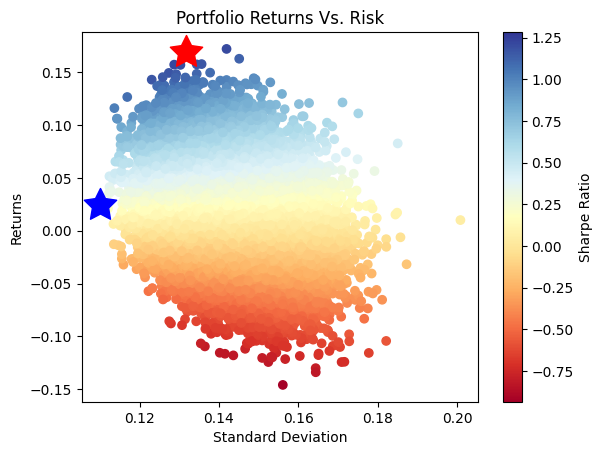

In [32]:
%matplotlib inline

# Plot the data on Scatter Plot
plt.scatter(
    y=simulations_df['Returns'],
    x=simulations_df['Volatility'],
    c=simulations_df['Sharpe Ratio'],
    cmap='RdYlBu'
)

# Give the plot some titles and axis labels
plt.title('Portfolio Returns Vs. Risk')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')

# Plot the max Sharpe Ratio using a red star
plt.scatter(
    max_sharp_ratio[1],
    max_sharp_ratio[0],
    marker=(5, 1, 0),
    color='r',
    s=600
)

# Plot the nim Volatility using a blue star
plt.scatter(
    min_volatility[1],
    min_volatility[0],
    marker=(5, 1, 0),
    color='b',
    s=600
)

# Show the plot
plt.show()

## Optimization

In [33]:
def get_metrics(weights: list) -> np.array:
    # Convert the weights to a numpy array
    weights = np.array(weights)
    
    # Calculate the returns
    ret = np.sum(log_return.mean() * weights) * 252
    
    # Calculate volatility
    vol = np. sqrt(
        np.dot(weights.T, np.dot(log_return.cov() * 252, weights))
    )
    
    # Calculate sharpe ratio
    sr = (ret - 0.1) / vol
    
    return np.array([ret, vol, sr])

def grab_negative_sharp(weights: list) -> np.array:
    
    return get_metrics(weights)[2] - 1

def grab_volatility(weights: list) -> np.array:
    
    return get_metrics(weights)[1] - 1

def check_sum(weights: list) -> float:
    
    return np.sum(weights) - 1


    